# Solow Model

Pablo Winant

> **Prerequisites**
>
> This tutorial refers to the lecture on the [convergence of
> sequences](../lectures/convergence/).
>
> Also, make sure you went through the [Julia
> Basics](./Julia_Basics.qmd) before.

# Tutorial: Convergence

### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the
following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what
remains:

$$i_t = y_t - c_t$$

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount
invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount
factor.

For now, we ignore the objective and assume that the saving rate
$s=\frac{c_t}{y_t}$ is constant over time.

**Create a `NamedTuple` to hold parameter values $\beta=0.96$,
$\delta=0.1$, $\alpha=0.3$, $\gamma=4$.**

``` {julia}
model = (;\alpha = 0.3, \beta = 0.96, \gamma = 4; \delta = 0.1)
```

**Write down the formula of function $f$ such that $k_{t+1}$:
$k_{t+1} = f(k_t)$.**

``` {julia}
# your text here
```

**Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent
$f$ for a given calibration**

``` {julia}
# your code here
```

**Write a function
`simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to
compute the simulation over `T` periods starting from initial capital
level `k0`.**

``` {julia}
# your code here
```

**Make a nice plot to illustrate the convergence. Do we get convergence
from any initial level of capital?**

``` {julia}
# your code here
```

**Suppose you were interested in using `f` to compute the steady-state.
What would you propose to measure convergence speed? To speed-up
convergence? Implement these ideas.**

``` {julia}
# your code here
```

### **Parameters**

In [1]:
model = (;α = 0.3, β = 0.96, γ= 4, δ = 0.1, s=0.2)


(α = 0.3, β = 0.96, γ = 4, δ = 0.1, s = 0.2)


### **Function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.**

In [2]:
function f(k,p)
    (; α, δ, s) = p 
    i = s*k^α
    K = (1-δ)*k + i 
end 

f (generic function with 1 method)

In [3]:
f(0.2, model)

0.30340677254400195

### **Simulate trajectory**

In [4]:
function simulate(k0, T, p)
    kvec = [k0]
    for t ∈ 1:T 
        k = kvec[end]
        K = f(k, p)
        push!(kvec, K)
    end
    return kvec 
end 

simulate (generic function with 1 method)

In [5]:
simulate(0.2, 100, model )

101-element Vector{Float64}:
 0.2
 0.30340677254400195
 0.4129080792968781
 0.525003373019628
 0.6373491155565568
 0.7483344417178636
 0.856841626057419
 0.9620988898971137
 1.0635841029776287
 1.1609587708409257
 1.2540211607320604
 1.3426721117933638
 1.4268895787302613
 ⋮
 2.686601895290714
 2.686965684058756
 2.6873040218731723
 2.6876186883735818
 2.6879113388853018
 2.6881835130861362
 2.6884366430712516
 2.6886720608576273
 2.688891005366757
 2.689094628921639
 2.6892840032916374
 2.6894601253165105

In [6]:
function simulate_noalloc(k0, T, p)
    kvec = zeros(T+1)
    kvec[1] = k0 
    for t ∈ 1:T 
        k = kvec[t]
        K = f(k, p)
        kvec[t+1] = K 
    end
    return kvec 
end 

simulate_noalloc (generic function with 1 method)

In [7]:
simulate_noalloc(0.2, 100, model )

101-element Vector{Float64}:
 0.2
 0.30340677254400195
 0.4129080792968781
 0.525003373019628
 0.6373491155565568
 0.7483344417178636
 0.856841626057419
 0.9620988898971137
 1.0635841029776287
 1.1609587708409257
 1.2540211607320604
 1.3426721117933638
 1.4268895787302613
 ⋮
 2.686601895290714
 2.686965684058756
 2.6873040218731723
 2.6876186883735818
 2.6879113388853018
 2.6881835130861362
 2.6884366430712516
 2.6886720608576273
 2.688891005366757
 2.689094628921639
 2.6892840032916374
 2.6894601253165105

### **Plots**

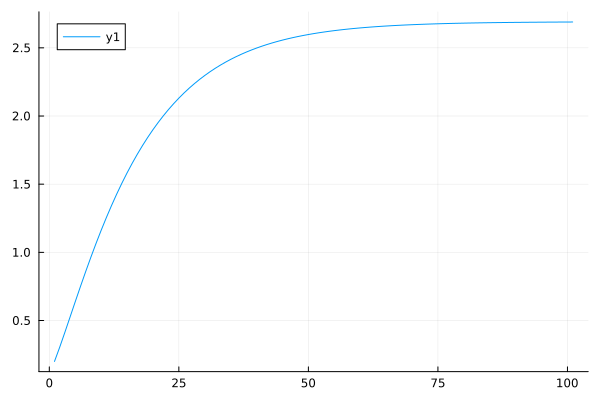

In [10]:
using Plots 
kv = simulate(0.2, 100, model)
plot(kv)

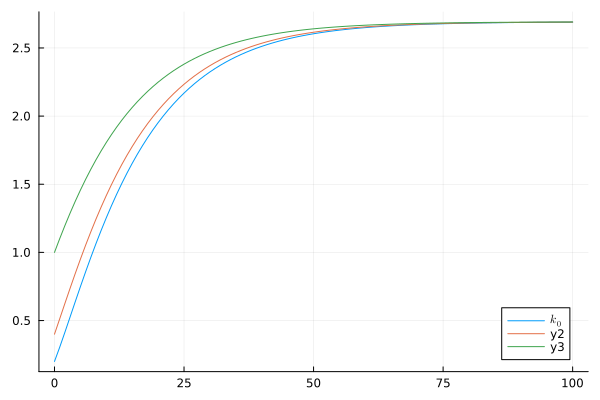

In [11]:
using Plots 

T = 100 
tv = 0:T
kv1 = simulate(0.2, T, model);
kv2 = simulate(0.4, T, model);
kv3 = simulate(1.0, T, model);

pl = plot()
plot!(pl, tv, kv1, label = "\$k_0\$")
plot!(pl, tv, kv2)
plot!(pl, tv, kv3)

In [ ]:
k_init = [0.2, 0.4, 1.0]
sims = [simulate(k0,T,model) for k0 in k_init]

3-element Vector{Vector{Float64}}:
 [0.2, 0.30340677254400195, 0.4129080792968781, 0.525003373019628, 0.6373491155565568, 0.7483344417178636, 0.856841626057419, 0.9620988898971137, 1.0635841029776287, 1.1609587708409257  …  2.6873040218731723, 2.6876186883735818, 2.6879113388853018, 2.6881835130861362, 2.6884366430712516, 2.6886720608576273, 2.688891005366757, 2.689094628921639, 2.6892840032916374, 2.6894601253165105]
 [0.4, 0.5119315585864748, 0.6243422704616431, 0.7355508583035453, 0.8443911415579223, 0.9500568333602588, 1.0520006449771238, 1.1498654505051582, 1.2434355847290326, 1.3326014179604118  …  2.687878421679744, 2.6881528990807855, 2.6884081711777905, 2.688645581245582, 2.6888663786779268, 2.68907172553918, 2.689262702660023, 2.689440315308841, 2.6896054984681297, 2.6897591217433026]
 [1.0, 1.1, 1.195801151884219, 1.2872430129191352, 1.3742574618933996, 1.456845771393547, 1.5350611815735393, 1.6089955116075123, 1.6787687913320717, 1.7445211874595348  …  2.689166098397878, 2.